In [ ]:
# Revisaremos patrones dentro de los datos, identificar relaciones entre las características y revisaremos valores atípicos que puedan existir.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv (r"C:\Users\valer\Downloads\world_population.csv")

In [5]:
#Realizamos una primera revisión rapida a los datos obtenidos del df
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [7]:
#Consultamos la info general de las columnas, aquí revisamos la consistencia y población de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [ ]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x) #cambio de digitos despues de la coma

In [9]:
#Revisamos los calculos e indicadores generales que nos entrega la función describe
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.300000e+02,2.330000e+02,2.300000e+02,2.270000e+02,2.270000e+02,2.290000e+02,2.290000e+02,2.300000e+02,2.320000e+02,230.000000,232.000000,234.000000
mean,117.500000,3.463225e+07,3.360071e+07,3.206600e+07,3.027016e+07,2.684050e+07,1.933046e+07,1.628288e+07,1.586650e+07,5.816637e+05,456.811652,1.009553,0.427051
std,67.694165,1.378892e+08,1.358732e+08,1.315071e+08,1.260742e+08,1.133525e+08,8.130962e+07,6.934547e+07,6.835586e+07,1.769133e+06,2083.740364,0.013390,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.064710e+05,3.942950e+05,3.827265e+05,3.294700e+05,2.619280e+05,2.237520e+05,1.458805e+05,2.567250e+03,36.598125,1.001925,0.010000
50%,117.500000,5.762857e+06,5.456681e+06,5.244415e+06,4.889741e+06,4.491202e+06,3.785847e+06,3.135123e+06,2.511718e+06,7.714100e+04,95.346750,1.007900,0.070000
75%,175.750000,2.265372e+07,2.152263e+07,1.973085e+07,1.682585e+07,1.562547e+07,1.188276e+07,9.817257e+06,8.817329e+06,4.146432e+05,236.884000,1.016650,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [11]:
#Consultamos la cantidad de nulls presente
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [13]:
#Consultamos la cantidad de datos unicos presente
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [15]:
# Revisamos los valores de mayor a menor
df.sort_values(by="World Population Percentage", ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,2.358249e+08,2.271967e+08,2.109693e+08,1.944545e+08,1.543699e+08,1.154141e+08,80624057.0,59290872.0,881912.0,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,2.185412e+08,2.083274e+08,1.839958e+08,1.609529e+08,1.228520e+08,9.521426e+07,72951439.0,55569264.0,923768.0,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,2.153135e+08,2.131963e+08,2.051882e+08,1.963535e+08,1.758737e+08,1.507064e+08,122288383.0,96369875.0,8515767.0,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,1.711864e+08,1.674210e+08,1.578300e+08,1.483911e+08,1.291933e+08,1.071477e+08,83929765.0,67541860.0,147570.0,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,1.447133e+08,1.456173e+08,1.446684e+08,1.432426e+08,1.468448e+08,1.480057e+08,138257420.0,130093010.0,17098242.0,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,1.275041e+08,1.259983e+08,1.201499e+08,1.125324e+08,9.787344e+07,8.172043e+07,67705186.0,50289306.0,1964375.0,64.9082,1.0063,1.60


In [19]:
#Evaluamos la correlación de las columnas
df.corr(numeric_only = True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.357989,-0.356283,-0.352850,-0.350009,-0.342095,-0.333014,-0.328620,-0.335737,-0.384854,0.128994,-0.220197,-0.358464
2022 Population,-0.357989,1.000000,0.999946,0.999492,0.998633,0.994602,0.991124,0.986675,0.973135,0.452812,-0.028761,-0.022059,0.999999
2020 Population,-0.356283,0.999946,1.000000,0.999764,0.999108,0.995582,0.992557,0.988392,0.975245,0.454902,-0.027802,-0.025976,0.999944
2015 Population,-0.352850,0.999492,0.999764,1.000000,0.999784,0.997343,0.994968,0.991346,0.979413,0.458101,-0.027740,-0.031150,0.999489
2010 Population,-0.350009,0.998633,0.999108,0.999784,1.000000,0.998595,0.996716,0.993628,0.983050,0.461498,-0.026635,-0.038262,0.998630
2000 Population,-0.342095,0.994602,0.995582,0.997343,0.998595,1.000000,0.999192,0.997247,0.990959,0.473137,-0.026341,-0.052041,0.994598
1990 Population,-0.333014,0.991124,0.992557,0.994968,0.996716,0.999192,1.000000,0.999257,0.997158,0.524392,-0.032348,-0.066718,0.991102
1980 Population,-0.328620,0.986675,0.988392,0.991346,0.993628,0.997247,0.999257,1.000000,0.999251,0.530726,-0.032167,-0.077794,0.986652
1970 Population,-0.335737,0.973135,0.975245,0.979413,0.983050,0.990959,0.997158,0.999251,1.000000,0.509942,-0.027523,-0.080020,0.973143
Area (km²),-0.384854,0.452812,0.454902,0.458101,0.461498,0.473137,0.524392,0.530726,0.509942,1.000000,-0.063545,-0.012829,0.453305


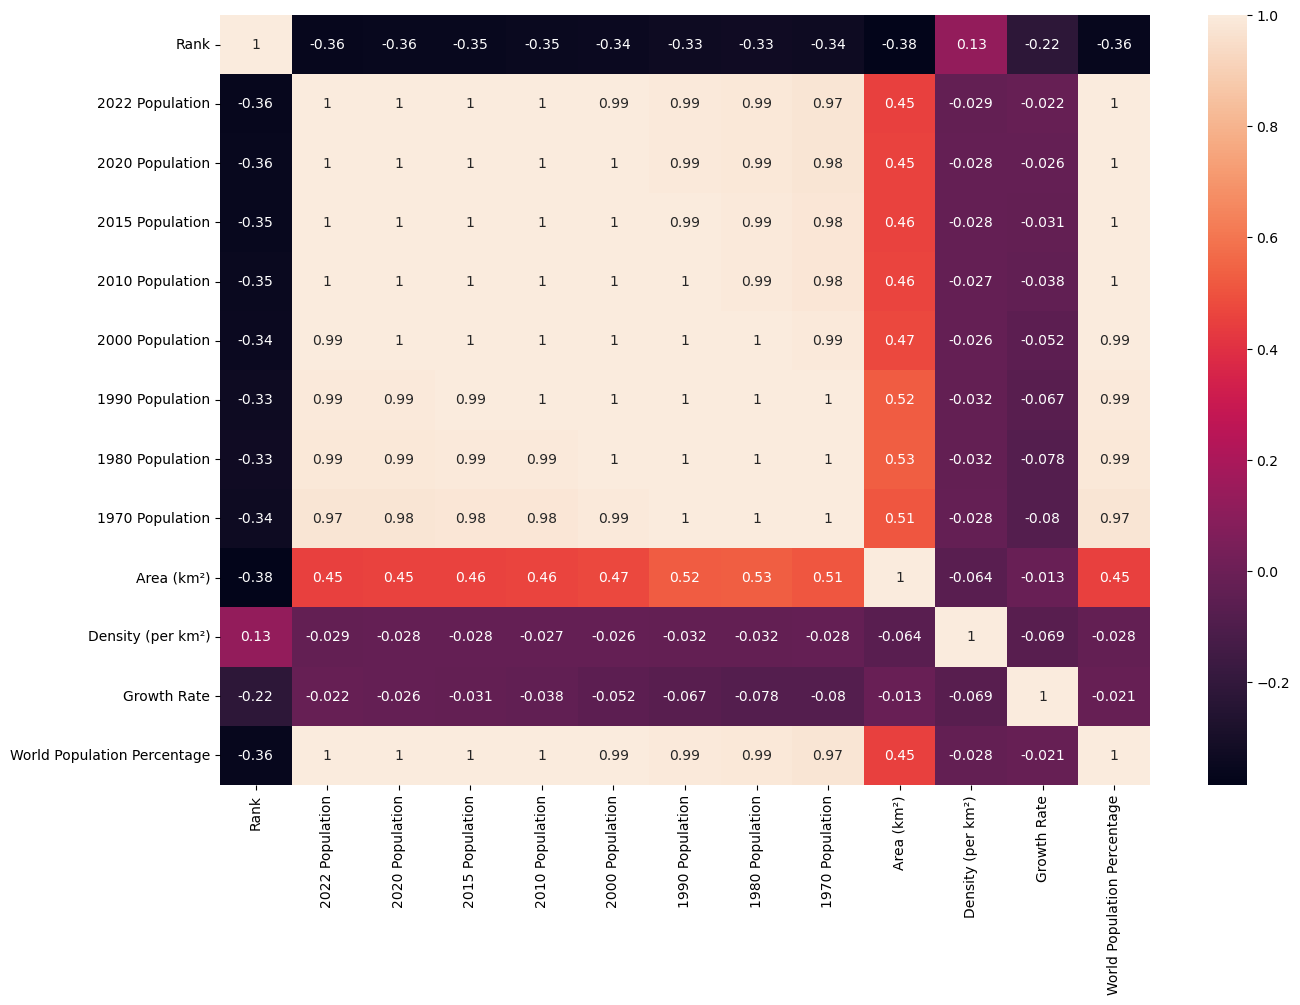

In [35]:
#Graficamos la correlación de las columnas para tener una mejor vista. A simple vista, los valores de área, densidad 
# y crecimiento tienen la correlación más baja, que puede estar indicada por paises con una densidad muy alta y menor area
# como paises asiaticos principalmente.

sns.heatmap(df.corr(numeric_only = True), annot = True)

plt.rcParams['figure.figsize'] = (15,5)

plt.show()

In [39]:
df.groupby('Continent').mean(numeric_only = True).sort_values(by="2022 Population",ascending=False)


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.560000,9.632739e+07,9.495513e+07,8.916500e+07,8.908777e+07,8.058084e+07,4.864000e+07,4.027833e+07,4.383988e+07,6.427628e+05,1025.024136,1.009384,1.183800
South America,97.571429,3.120119e+07,3.082357e+07,2.950960e+07,2.678940e+07,2.501589e+07,2.122474e+07,1.727064e+07,1.378194e+07,1.301303e+06,20.971979,1.007957,0.391429
Africa,92.157895,2.545588e+07,2.387144e+07,2.141970e+07,1.889820e+07,1.459837e+07,1.137696e+07,8.586032e+06,6.567175e+06,5.378793e+05,126.406569,1.021180,0.313509
Europe,124.500000,1.505537e+07,1.491584e+07,1.502745e+07,1.471228e+07,1.481769e+07,1.478520e+07,1.420000e+07,1.311848e+07,4.602082e+05,663.324742,1.002256,0.186600
North America,160.925000,1.500740e+07,1.485591e+07,1.425960e+07,1.356802e+07,1.215174e+07,1.053166e+07,9.207334e+06,7.885865e+06,6.061044e+05,272.494118,1.004285,0.187750
Oceania,188.521739,2.046386e+06,1.910149e+06,1.756664e+06,1.613164e+06,1.357512e+06,1.162775e+06,9.965322e+05,8.469683e+05,3.702209e+05,132.543065,1.007383,0.023913


In [41]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [43]:
df2 = df.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].mean(numeric_only = True).sort_values(by="2022 Population",ascending=False)
df2

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,4.383988e+07,4.027833e+07,4.864000e+07,8.058084e+07,8.908777e+07,8.916500e+07,9.495513e+07,9.632739e+07
South America,1.378194e+07,1.727064e+07,2.122474e+07,2.501589e+07,2.678940e+07,2.950960e+07,3.082357e+07,3.120119e+07
Africa,6.567175e+06,8.586032e+06,1.137696e+07,1.459837e+07,1.889820e+07,2.141970e+07,2.387144e+07,2.545588e+07
Europe,1.311848e+07,1.420000e+07,1.478520e+07,1.481769e+07,1.471228e+07,1.502745e+07,1.491584e+07,1.505537e+07
North America,7.885865e+06,9.207334e+06,1.053166e+07,1.215174e+07,1.356802e+07,1.425960e+07,1.485591e+07,1.500740e+07
Oceania,8.469683e+05,9.965322e+05,1.162775e+06,1.357512e+06,1.613164e+06,1.756664e+06,1.910149e+06,2.046386e+06


In [45]:
# creamos un nueva df con la transposición de las columnas, para no sobreescribir nuestra df anterior
df3 = df2.transpose()
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,4.383988e+07,1.378194e+07,6.567175e+06,1.311848e+07,7.885865e+06,8.469683e+05
1980 Population,4.027833e+07,1.727064e+07,8.586032e+06,1.420000e+07,9.207334e+06,9.965322e+05
1990 Population,4.864000e+07,2.122474e+07,1.137696e+07,1.478520e+07,1.053166e+07,1.162775e+06
2000 Population,8.058084e+07,2.501589e+07,1.459837e+07,1.481769e+07,1.215174e+07,1.357512e+06
2010 Population,8.908777e+07,2.678940e+07,1.889820e+07,1.471228e+07,1.356802e+07,1.613164e+06
2015 Population,8.916500e+07,2.950960e+07,2.141970e+07,1.502745e+07,1.425960e+07,1.756664e+06
2020 Population,9.495513e+07,3.082357e+07,2.387144e+07,1.491584e+07,1.485591e+07,1.910149e+06
2022 Population,9.632739e+07,3.120119e+07,2.545588e+07,1.505537e+07,1.500740e+07,2.046386e+06


<Axes: >

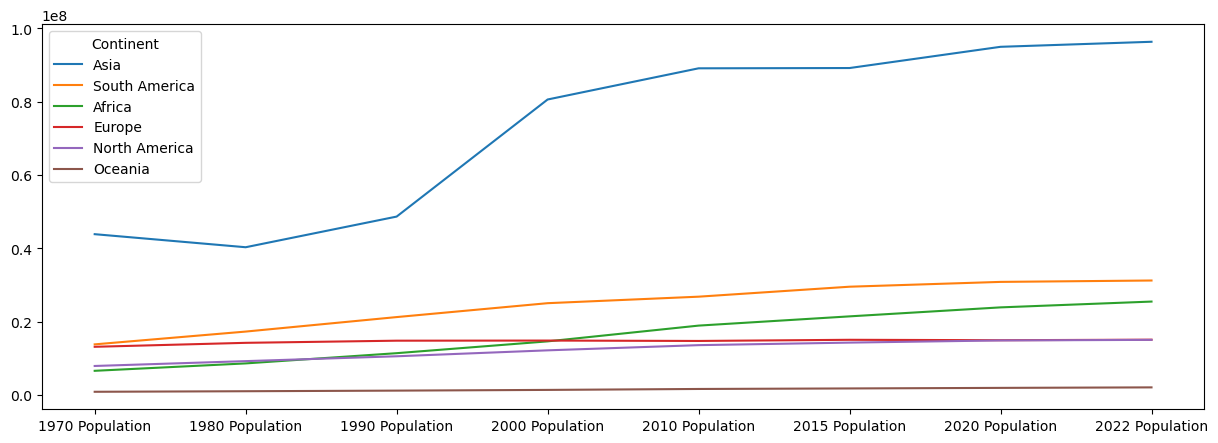

In [47]:
df3.plot()
# Con este gráfico podemos reafirmar los datos encontrados en nuestra tabla de correlación, donde el continente asiatico tiene el
# mayor crecimiento respecto a otros continentes y además, su crecimiento se ha superado exponencialmente a través de los años.

<Axes: >

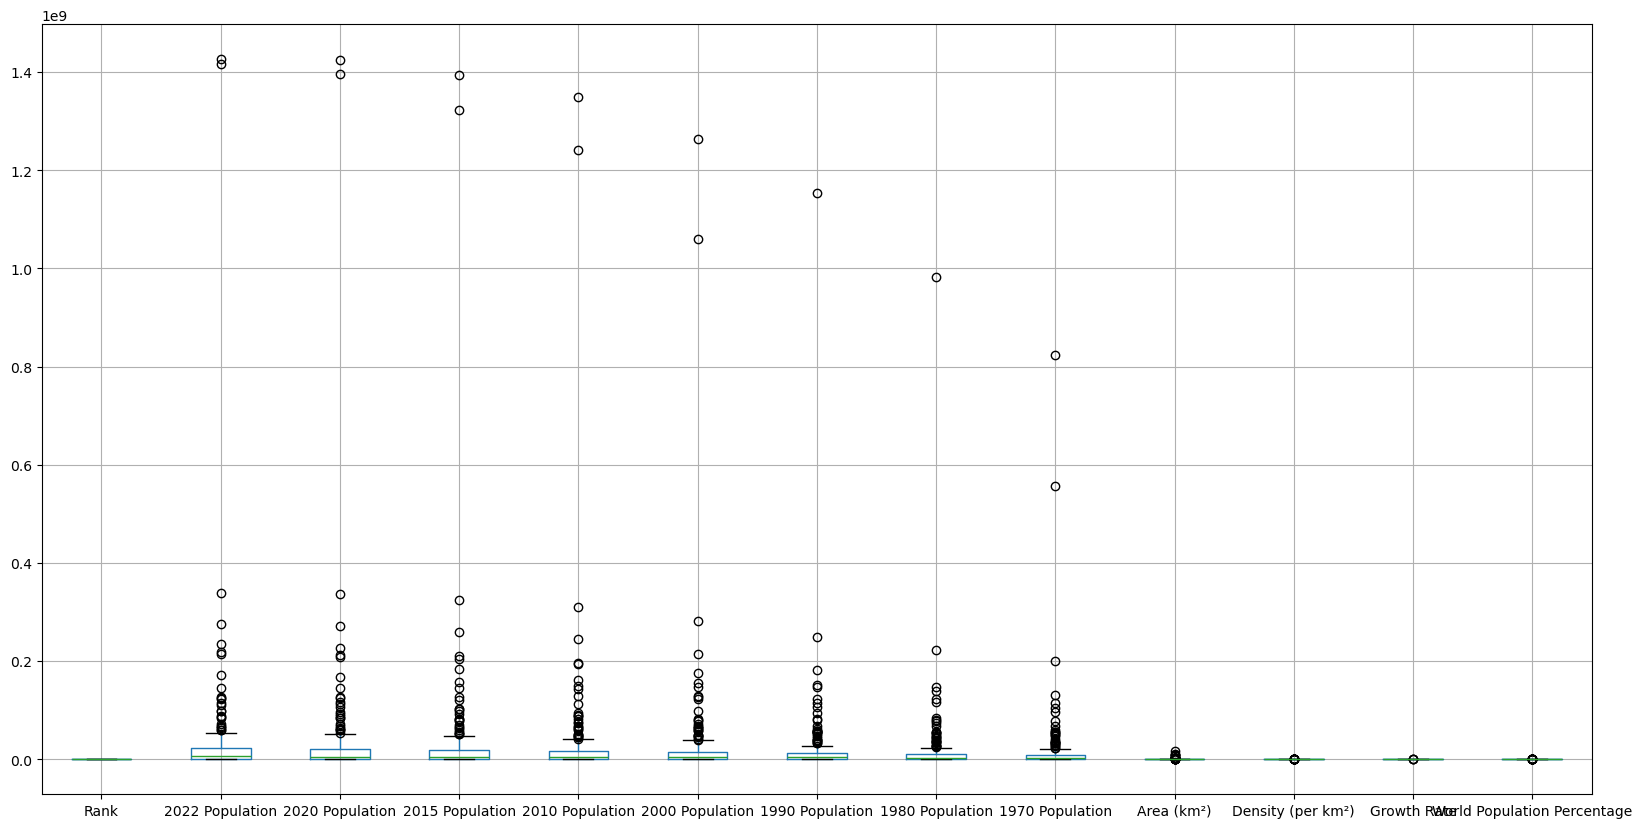

In [49]:
df.boxplot(figsize=(20,10))

#Revisamos valores atipicos o fuera del rango 

In [51]:
df2.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].max(numeric_only = True).sort_values(by="2022 Population",ascending=False)

# Dado a los puntos desviados del gráfico superior, revisamos la coherencia de los máximos valores de cada continente. Si bien no están concentrados 
# en el rango 0,1-0,3. Son coherentes con los datos a grandes rasgos.

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,4.383988e+07,4.027833e+07,4.864000e+07,8.058084e+07,8.908777e+07,8.916500e+07,9.495513e+07,9.632739e+07
South America,1.378194e+07,1.727064e+07,2.122474e+07,2.501589e+07,2.678940e+07,2.950960e+07,3.082357e+07,3.120119e+07
Africa,6.567175e+06,8.586032e+06,1.137696e+07,1.459837e+07,1.889820e+07,2.141970e+07,2.387144e+07,2.545588e+07
Europe,1.311848e+07,1.420000e+07,1.478520e+07,1.481769e+07,1.471228e+07,1.502745e+07,1.491584e+07,1.505537e+07
North America,7.885865e+06,9.207334e+06,1.053166e+07,1.215174e+07,1.356802e+07,1.425960e+07,1.485591e+07,1.500740e+07
Oceania,8.469683e+05,9.965322e+05,1.162775e+06,1.357512e+06,1.613164e+06,1.756664e+06,1.910149e+06,2.046386e+06
